In [1]:
import cv2
import ultralytics
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
cv2.__version__

'4.10.0'

In [3]:
ultralytics.__version__

'8.3.21'

#### Models available on ultralytics

- [Object Detection](https://docs.ultralytics.com/tasks/detect/)
- [OBB (Oriented Bounding Boxes)](https://docs.ultralytics.com/tasks/obb/)


In [4]:
IMAGE_PATH="data/planes.jpg"
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
# Load a YOLO model pretrained on COCO dataset
model = ultralytics.YOLO("data/yolo11n.pt")
# Display model information (optional)
model.info()

YOLO11n summary: 319 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(319, 2624080, 0, 6.614336)


0: 384x640 5 airplanes, 69.4ms
Speed: 2.3ms preprocess, 69.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


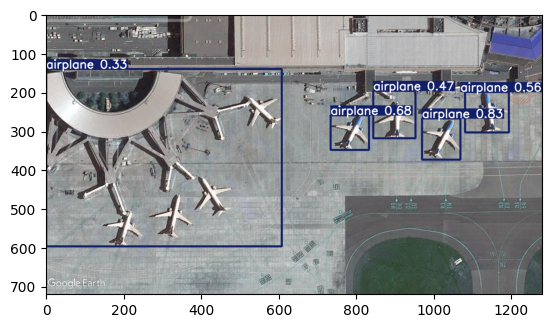

In [6]:
results = model.predict(image) #, iou=0.44, conf=0.66)
im_array = results[0].plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
plt.imshow(im)

In [7]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 4., 4., 4., 4.])
conf: tensor([0.8297, 0.6786, 0.5559, 0.4705, 0.3337])
data: tensor([[9.7047e+02, 2.6855e+02, 1.0693e+03, 3.7439e+02, 8.2972e-01, 4.0000e+00],
        [7.3435e+02, 2.6018e+02, 8.3348e+02, 3.4951e+02, 6.7860e-01, 4.0000e+00],
        [1.0810e+03, 2.0070e+02, 1.1942e+03, 3.0410e+02, 5.5589e-01, 4.0000e+00],
        [8.4403e+02, 1.9764e+02, 9.5342e+02, 3.1952e+02, 4.7047e-01, 4.0000e+00],
        [3.4723e-01, 1.4160e+02, 6.0872e+02, 5.9739e+02, 3.3370e-01, 4.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([5, 6])
xywh: tensor([[1019.8827,  321.4688,   98.8276,  105.8371],
        [ 783.9120,  304.8455,   99.1311,   89.3350],
        [1137.6101,  252.4033,  113.1982,  103.4014],
        [ 898.7230,  258.5793,  109.3893,  121.8715],
        [ 304.5345,  369.4952,  608.3746,  455.7842]])
xywhn: tensor([[0.7968, 0.4465, 0.0772, 0.1470],
        [0.6124, 0.4234, 0.0774, 0.

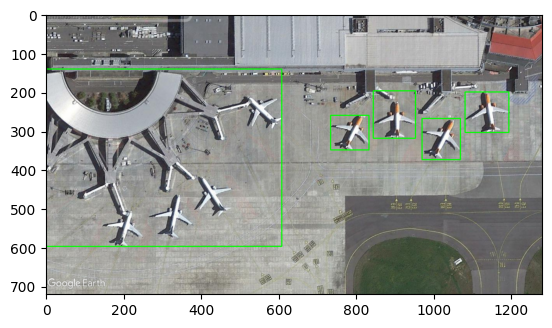

In [8]:
tmp=image.copy()
for box in results[0].boxes.xyxy:
 cv2.rectangle(tmp, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
plt.imshow(tmp)

In [9]:
# YOLO OBB (Oriented Bounding Boxes) model pretrained on the DOTAv1
model = ultralytics.YOLO("data/yolo11n-obb.pt")
model.info()

YOLO11n-obb summary: 344 layers, 2,664,432 parameters, 0 gradients, 6.7 GFLOPs


(344, 2664432, 0, 6.7032192)


0: 576x1024 121.1ms
Speed: 6.5ms preprocess, 121.1ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)


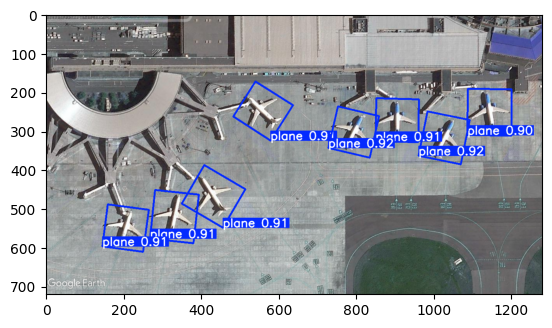

In [10]:
results = model.predict(image)
im_array = results[0].plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
plt.imshow(im)

In [11]:
results[0].obb

ultralytics.engine.results.OBB object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0.])
conf: tensor([0.9161, 0.9157, 0.9141, 0.9114, 0.9092, 0.9079, 0.9058, 0.9046])
data: tensor([[1.0275e+03, 3.1827e+02, 1.1641e+02, 1.1044e+02, 1.7700e+00, 9.1613e-01, 0.0000e+00],
        [7.9431e+02, 3.0337e+02, 1.0980e+02, 1.0919e+02, 1.7972e+00, 9.1572e-01, 0.0000e+00],
        [9.0650e+02, 2.7341e+02, 1.1081e+02, 1.0978e+02, 1.5894e+00, 9.1412e-01, 0.0000e+00],
        [5.6018e+02, 2.4928e+02, 1.1428e+02, 1.0762e+02, 5.6760e-01, 9.1145e-01, 0.0000e+00],
        [2.0545e+02, 5.5050e+02, 1.0802e+02, 1.0610e+02, 1.7026e+00, 9.0922e-01, 0.0000e+00],
        [3.3116e+02, 5.2111e+02, 1.2567e+02, 1.1303e+02, 1.6770e+00, 9.0793e-01, 0.0000e+00],
        [4.3237e+02, 4.6880e+02, 1.2291e+02, 1.1426e+02, 5.2857e-01, 9.0577e-01, 0.0000e+00],
        [1.1449e+03, 2.5241e+02, 1.1905e+02, 1.1361e+02, 1.5738e+00, 9.0464e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torc

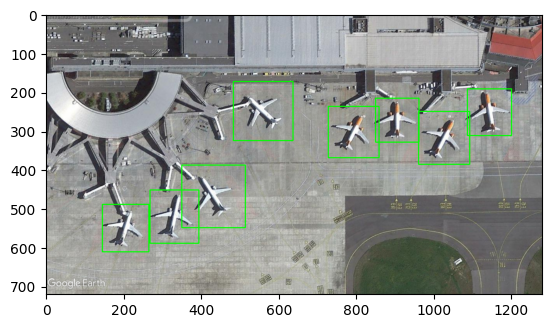

In [12]:
tmp=image.copy()
for box in results[0].obb.xyxy:
 cv2.rectangle(tmp, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
plt.imshow(tmp)